In [1]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import r2_score

In [2]:
# Let's import the dataset using panads
bike_df = pd.read_csv('SeoulBikeData.csv', encoding='cp1252') # The encoding needs to be changed
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Preprocessing and Data Cleaning
### Check the data types of the different features of the dataset.

In [3]:
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

### Check and remove the rows for any duplicates and NA values

In [4]:
# Check the initial length
print('Num of initial rows:', bike_df.shape[0])

# Drop duplicates and also drop NA values
bike_df.drop_duplicates(inplace=True)
bike_df.dropna(inplace=True)

# Check rows after dropping duplicates
print('Num of rows after removing duplicates and NA values:', bike_df.shape[0])

Num of initial rows: 8760
Num of rows after removing duplicates and NA values: 8760


So there are no duplicates or NA values.

### Let's now check the summary statistics of the features which have numerical data

In [5]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Now let's check the unique values for the other columns which have text data

The last three columns have text data. So check the unique values in these columns

In [ ]:
print({bike_df.iloc[:,-i].name: bike_df.iloc[:,-i].unique().tolist() for i in range(1,4)})

{'Functioning Day': ['Yes', 'No'], 'Holiday': ['No Holiday', 'Holiday'], 'Seasons': ['Winter', 'Spring', 'Summer', 'Autumn']}


So there are only two values for 'Functioning Day' and 'Holiday'. Can be converted to binary for boolean.

### Now let's clean the datasets

In [7]:
# First rename the columns so that it is easier to access
bike_df.rename(columns={'Date': 'date',
                        'Rented Bike Count': 'bike_count',
                        'Hour': 'hour',
                        'Temperature(°C)': 'temperature',
                        'Humidity(%)': 'humidity',
                        'Wind speed (m/s)': 'wind_speed',
                        'Visibility (10m)': 'visibility',
                        'Dew point temperature(°C)': 'dew_point_temp',
                        'Solar Radiation (MJ/m2)': 'solar_radiation',
                        'Rainfall(mm)': 'rainfall',
                        'Snowfall (cm)': 'snowfall',
                        'Seasons': 'seasons',
                        'Holiday': 'holiday', 
                        'Functioning Day': 'functioning_day'
                        },
          inplace=True)

In [8]:
# Now change the date column datatype to date
bike_df['date'] = pd.to_datetime(bike_df['date'], format = '%d/%m/%Y')

# Extract the year, month, day, and weekday from the date
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month
bike_df['month_names'] = bike_df['date'].dt.month_name()
bike_df['day'] = bike_df['date'].dt.day
bike_df['weekday'] = bike_df['date'].dt.weekday # 0: Monday to 6: Sunday

In [9]:
# Check if the changes has taken place or not.

bike_df.head()

,date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_names,day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,December,1,4


In [10]:
# Convert the functioning_day and holiday columns to binary
bike_df['functioning_day'] = np.where(bike_df['functioning_day'] == 'Yes', 1, 0)
bike_df['holiday'] = np.where(bike_df['holiday'] == 'Holiday', 1, 0)

# Verify that the values have changed
bike_df.head()

,date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_names,day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,December,1,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,December,1,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,2017,12,December,1,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,2017,12,December,1,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,2017,12,December,1,4


### Let's do some EDA

Text(0.5, 0, 'Seasons')

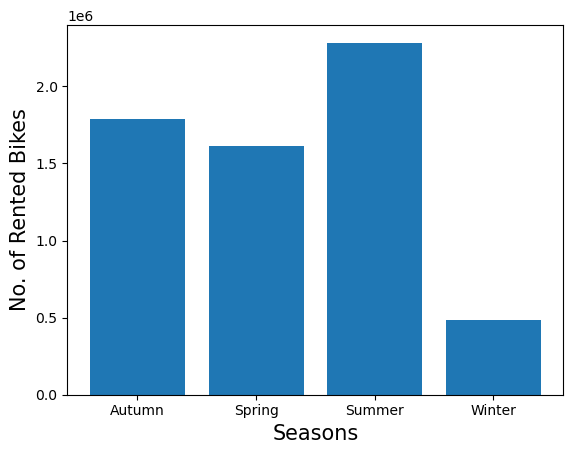

In [11]:
# Let's group the total number of rented bikes based on the seasons.
season_df = bike_df.groupby(['seasons'])['bike_count'].sum().reset_index()

# Plot th season stats
fig, ax1 = plt.subplots()
im = ax1.bar(season_df['seasons'], season_df['bike_count'], width = 0.8, color='tab:blue')
ax1.set_ylabel('No. of Rented Bikes', size = 15)
ax1.set_xlabel('Seasons', size = 15)

Looks like the number of bikes rented decreases significantly during the winter times. All other seasons have similar stats.

Text(0.5, 0, 'Day')

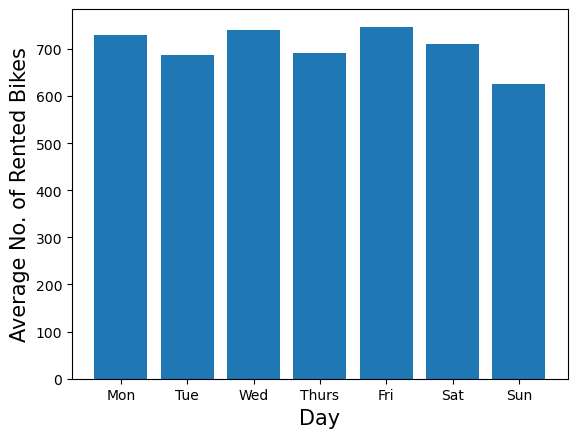

In [12]:
# Is there a relationship between the number of bikes rented vs the day of the week?
weekday_df = bike_df.groupby(['weekday'])['bike_count'].mean().reset_index()
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

fig, ax2 = plt.subplots()
im = ax2.bar(weekday_df['weekday'], weekday_df['bike_count'], width = 0.8, color='tab:blue')
ax2.set_xticks(list(day_names.keys()), list(day_names.values()))
ax2.set_ylabel('Average No. of Rented Bikes', size = 15)
ax2.set_xlabel('Day', size = 15)

Looks like there isn't any obvious or significant relationship between the average number of rented bikes vs the day.

/Users/rajeebsharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rajeebsharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


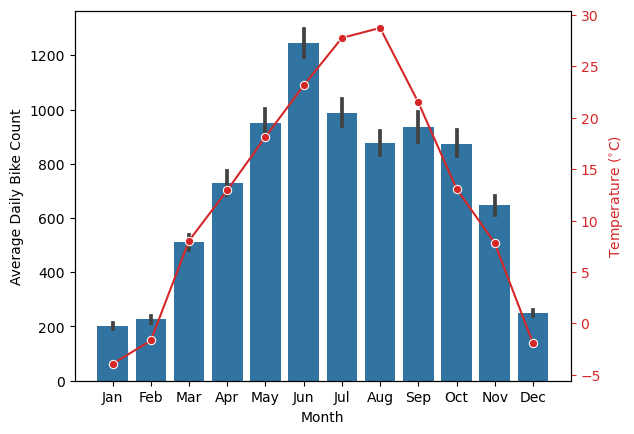

In [13]:
# Lets also check the average rental by month.
# We can create a plot like above using Seaborn as well. Since Seaborn is configured for statistics, it is actually easier there.
# We can create similar plots like before without creating a new dataframe. Let's do average bike count for each month.

month_names = {0: 'Jan', 1: 'Feb', 2: 'Mar', 3: 'Apr', 4: 'May', 5: 'Jun', 6: 'Jul', 7: 'Aug', 8:'Sep', 9:'Oct', 10:'Nov', 11:'Dec'}

fig, ax1 = plt.subplots()
sns.barplot(data=bike_df, x='month', y='bike_count', ax=ax1, color='tab:blue', alpha=1)

# Lets also add average temperature for each month.
ax2 = ax1.twinx()
im = sns.lineplot(x=bike_df['month']-1, y=bike_df['temperature'], ax=ax2, color='tab:red', marker='o', errorbar=None, alpha=1) # -1 is to align the month properly to the bar plot.


ax1.set_xlabel('Month')
ax1.set_ylabel('Average Daily Bike Count')
ax1.set_xticks(list(month_names.keys()), list(month_names.values()))
ax2.set_ylabel(r'Temperature ($^{\circ}$C)', color='tab:red')
ax2.tick_params(axis='y', colors='tab:red')

plt.show()

Looks like there is a nice relationship between the temperature and number of bike rentals, upto a point. After which it starts to decrease again.

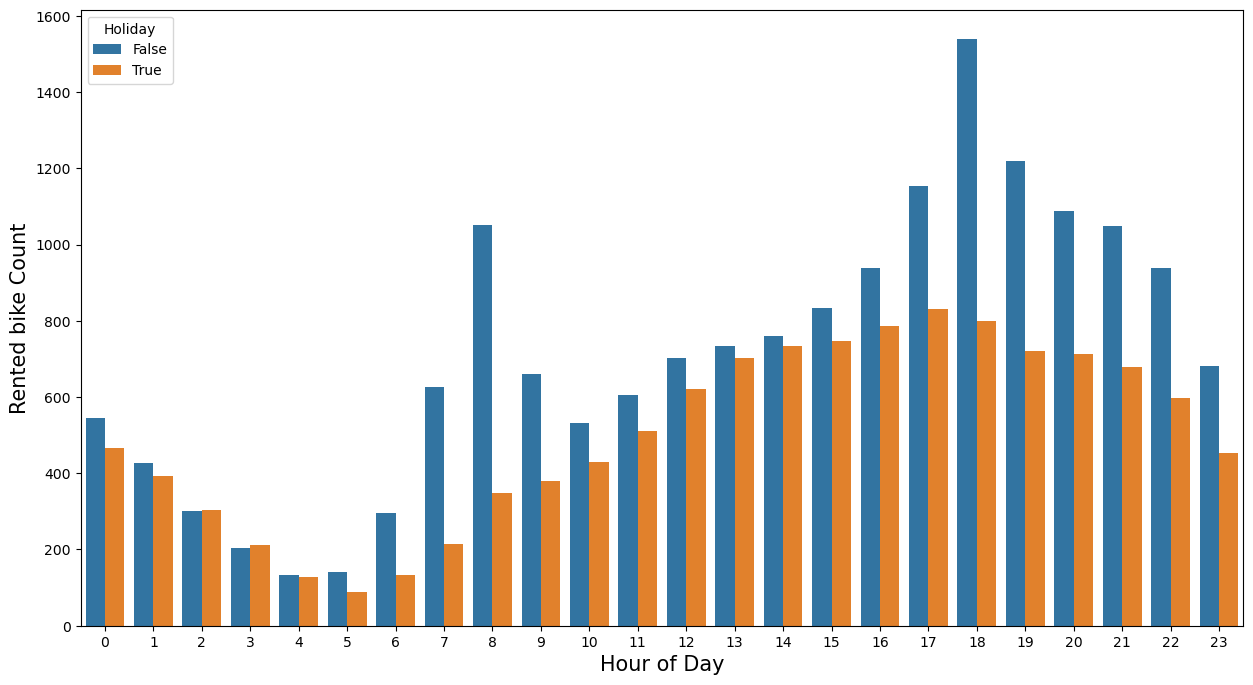

In [14]:
# Let's check the average rental by the hour. 
fig, ax1 = plt.subplots(figsize=(15,8))
sns.barplot(data=bike_df, x='hour', y='bike_count', hue='holiday', ax=ax1, errorbar=None, alpha=1)

ax1.set_ylabel('Rented bike Count', size = 15)
ax1.set_xlabel('Hour of Day', size = 15)
plt.legend(title='Holiday', loc='upper left', labels=['False', 'True'])
plt.show()

Looks like in most cases, the number of bike rentals is higher during workdays compared to holidays. Also the highest number of rentals in towards the evening time, with another peak at morning 0700 - 1000.

### Now let's do some Machine Learning on this dataset. Let's try to predict the number of bikes rented using regression techniques.

In [15]:
# Let's define some functions that we will likely use a lot
def fit_model(X_train_data, X_test_data, y_train_data, y_test_model, model, model_name):
    # Fit the dataset
    model.fit(X_train_data, y_train_data)

    # Now predict the y_values
    y_pred = model.predict(X_test_data)

    # Convert to a pandas Series
    y_pred_series = pd.Series(y_pred, name='Predicted_bike_test')

    # Check the r2 value and RMSE value of the prediction.
    bike_r2 = r2_score(y_test_model, y_pred_series)
    bike_mae = mae(y_test_model, y_pred_series)
    bike_rmse = rmse(y_test_model, y_pred_series)
    
    print('%s Model R^2 value: ' %model_name, bike_r2)
    print('%s Mean Absolute Error value: ' %model_name, bike_mae)
    print('%s Root Mean Squared Error value: ' %model_name, bike_rmse)

    return y_pred_series

In [16]:
def plot_values(y_test_orig, y_test_pred):
    fig, ax = plt.subplots()
    sns.scatterplot(x=y_test_orig, y=y_test_pred, ax=ax)
    plt.plot([y_test_orig.min(),y_test_orig.max()], [y_test_orig.min(),y_test_orig.max()], color='r')
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()


In [17]:
# First let's choose which features you want to use.
# We do not need date columns and month names.
X = bike_df[['hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'functioning_day', 'month', 'weekday',]]

y = bike_df['bike_count']

# Let's convert the seasons from categorical to numerical value and replace the X feature
le = LabelEncoder()
X['seasons'] = le.fit_transform(X['seasons'])


# Now split data to train-test categories.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Remove index of the values
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

/var/folders/6h/pn_zw6hd4yg1ffdqn1c6m1bc0000gn/T/ipykernel_15421/248471668.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['seasons'] = le.fit_transform(X['seasons'])


Linear Regression Model R^2 value:  0.5528433054843149
Linear Regression Mean Absolute Error value:  329.84104395080664
Linear Regression Root Mean Squared Error value:  439.68457584448566


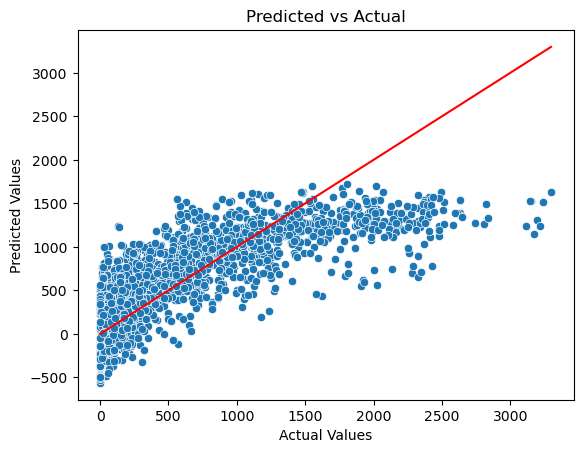

In [18]:
# Initiate the model
lr_model = LinearRegression()

# Let's try a simple linear regression model first
linear_regression_y_pred = fit_model(X_train, X_test, y_train, y_test, lr_model, 'Linear Regression')

# Let's also plot the predictions vs the true values
plot_values(y_test, linear_regression_y_pred)


What we can see is that there are a lot of negative values in the predicted bike rental. This does not make sense. Also, maybe not all features are important?

Let's try to see which features are most important.

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test, k_val):
    fs = SelectKBest(score_func=f_regression, k=k_val)
    # learn relationship from training data
    fs.fit(X_train, y_train)
	# transform train input data
    X_train_fs = fs.transform(X_train)
	# transform test input data
    X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs

for i in range(1, len(X_train.columns)+1):
    X_train_fs, X_test_fs = select_features(X_train, y_train, X_test, i)

    # Initiate the model
    lr_model = LinearRegression()

    print('Number of features chosen: ', i)
    y_pred_series = fit_model(X_train_fs,  X_test_fs, y_train, y_test, lr_model, 'Linear Regression Feature Selection')
    print('-'*100)


Number of features chosen:  1
Linear Regression Feature Selection Model R^2 value:  0.30006915038953674
Linear Regression Feature Selection Mean Absolute Error value:  406.7744775088168
Linear Regression Feature Selection Root Mean Squared Error value:  550.0965611814248
----------------------------------------------------------------------------------------------------
Number of features chosen:  2
Linear Regression Feature Selection Model R^2 value:  0.4255195574103675
Linear Regression Feature Selection Mean Absolute Error value:  370.14246887809384
Linear Regression Feature Selection Root Mean Squared Error value:  498.3666662742544
----------------------------------------------------------------------------------------------------
Number of features chosen:  3
Linear Regression Feature Selection Model R^2 value:  0.4570578004077924
Linear Regression Feature Selection Mean Absolute Error value:  356.4528992966368
Linear Regression Feature Selection Root Mean Squared Error value:  4

So it looks like it is better to use all of the features for the best results. However, the results are not that good. With $R^2 \sim 0.55$ and RMSE $\approx 440$, we can definitely improve it.

Based on the plot, we can maybe take care of the negative values and see how it will effect the results and perhaps linear models are not that good.

/Users/rajeebsharma/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='bike_count', ylabel='Count'>

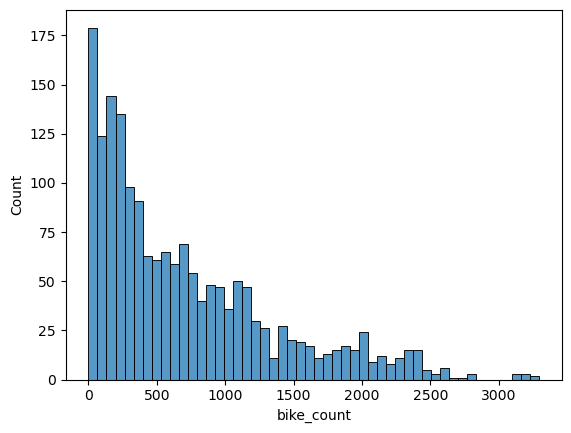

In [20]:
# Let's plot the y_train data on a histogram to see if we can identify the source of negative values.
fig, ax5 = plt.subplots()
sns.histplot(x=y_test, bins= 50, ax=ax5)


There seems to be a lot of 0 values, which likely affects the results. Lets look at these further in the original dataframe.

In [21]:
bike_df[bike_df['bike_count']==0]

,date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_names,day,weekday
3144,2018-04-11,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,0,0,2018,4,April,11,2
3145,2018-04-11,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,0,0,2018,4,April,11,2
3146,2018-04-11,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,0,0,2018,4,April,11,2
3147,2018-04-11,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,0,0,2018,4,April,11,2
3148,2018-04-11,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,0,0,2018,4,April,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,2018-11-09,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,0,0,2018,11,November,9,4
8252,2018-11-09,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,0,0,2018,11,November,9,4
8253,2018-11-09,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,0,0,2018,11,November,9,4
8254,2018-11-09,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,0,0,2018,11,November,9,4


So there are 295 counts with 0 rentals.

In [22]:
# Let's summarize this subset.
bike_df[bike_df['bike_count']==0].describe()

,date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,holiday,functioning_day,year,month,day,weekday
count,295,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295.000000,295.0,295.0,295.000000,295.000000,295.000000
mean,2018-09-12 17:34:22.372881408,0.0,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.0,0.081356,0.0,2018.0,9.023729,12.264407,2.803390
min,2018-04-11 00:00:00,0.0,0.000000,5.200000,21.000000,0.000000,201.000000,-7.000000,0.000000,0.000000,0.0,0.000000,0.0,2018.0,4.000000,2.000000,1.000000
25%,2018-09-19 00:00:00,0.0,5.000000,12.300000,49.000000,0.900000,1055.000000,5.300000,0.000000,0.000000,0.0,0.000000,0.0,2018.0,9.000000,6.000000,1.000000
50%,2018-10-02 00:00:00,0.0,11.000000,16.300000,62.000000,1.500000,1814.000000,7.800000,0.000000,0.000000,0.0,0.000000,0.0,2018.0,10.000000,9.000000,3.000000
75%,2018-10-09 00:00:00,0.0,17.000000,19.350000,73.000000,2.350000,2000.000000,11.000000,1.065000,0.000000,0.0,0.000000,0.0,2018.0,10.000000,18.000000,4.000000
max,2018-11-09 00:00:00,0.0,23.000000,26.500000,96.000000,5.300000,2000.000000,16.100000,3.320000,18.000000,0.0,1.000000,0.0,2018.0,11.000000,30.000000,6.000000
std,NaN,0.0,6.979501,4.690414,16.331779,1.094120,580.913593,4.373466,0.883754,1.203795,0.0,0.273845,0.0,0.0,2.143519,8.938067,1.658411


These 295 rows that contain 0 bike rentals appear to be associated with the `functioning_day` feature. If `functioning_day` is `false`, then bike rentals is 0. Let's check that.

In [23]:
print(bike_df[bike_df['functioning_day']==0].equals(bike_df[bike_df['bike_count']==0]))

True


Looks like it is the same same 295 rows. Let's remove them

In [24]:
bike_df = bike_df[bike_df['functioning_day'] != 0]

In [25]:
# Let's check the rows are removed.
bike_df[bike_df['functioning_day']==0] 

,date,bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,month_names,day,weekday


All gone!

In [26]:
# Now let's redefine the X and y values
X = bike_df[['hour', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'month', 'weekday']]

y = bike_df['bike_count']

# Let's convert the seasons from categorical to numerical value and replace the X feature
le = LabelEncoder()
X['seasons'] = le.fit_transform(X['seasons'])


# Now split data to train-test categories.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Remove index of the values
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

/var/folders/6h/pn_zw6hd4yg1ffdqn1c6m1bc0000gn/T/ipykernel_15421/412707914.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['seasons'] = le.fit_transform(X['seasons'])


Linear Regression Model R^2 value:  0.5385125769377556
Linear Regression Mean Absolute Error value:  325.46385773157004
Linear Regression Root Mean Squared Error value:  434.60203139666476


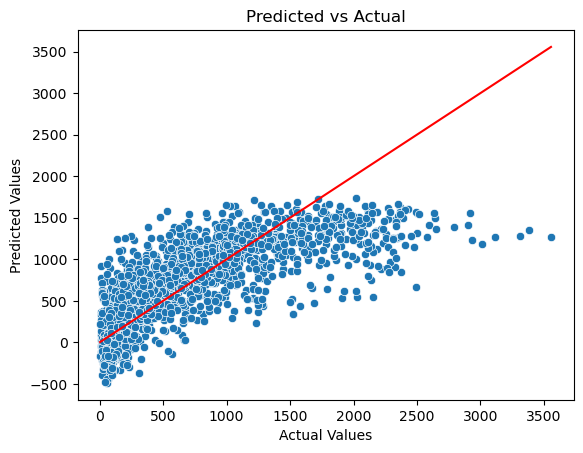

In [27]:
# And redo the fitting

# Initiate the model
lr_model = LinearRegression()

# Let's try a simple linear regression model first
linear_regression_y_pred = fit_model(X_train, X_test, y_train, y_test, lr_model, 'Linear Regression')

# Let's also plot the predictions vs the true values
plot_values(y_test, linear_regression_y_pred)

Nope, does not seem to help the case much. In fact the $R^2$ got a little bit worse, though the RMSE value got a little bit better.

Let's try a different model. How about a polynomial model?

In [28]:
from sklearn.preprocessing import PolynomialFeatures
degrees = np.arange(2,5)

# Initiate the model
poly_model = LinearRegression()

for i in degrees:
    poly_features = PolynomialFeatures(degree=i)
    poly_X_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.fit_transform(X_test)
    # Let's try a simple linear regression model first
    print('Number polynomial degrees: ', i)
    polynomial_regression_y_pred = fit_model(poly_X_train, poly_X_test, y_train, y_test, poly_model, 'Polynomial Regression')
    print('-'*100)
#plot_values(y_test, linear_regression_y_pred)

Number polynomial degrees:  2
Polynomial Regression Model R^2 value:  0.6749450582317433
Polynomial Regression Mean Absolute Error value:  260.0650151818997
Polynomial Regression Root Mean Squared Error value:  364.745719234502
----------------------------------------------------------------------------------------------------
Number polynomial degrees:  3
Polynomial Regression Model R^2 value:  0.6676041298424573
Polynomial Regression Mean Absolute Error value:  203.82679291689803
Polynomial Regression Root Mean Squared Error value:  368.84137023426047
----------------------------------------------------------------------------------------------------
Number polynomial degrees:  4
Polynomial Regression Model R^2 value:  -7.379766878535101
Polynomial Regression Mean Absolute Error value:  255.23904133051175
Polynomial Regression Root Mean Squared Error value:  1851.9437246786679
----------------------------------------------------------------------------------------------------


The best that did was a polynomial model with 3 degrees. But even that is not too good. Let's try something new. Let's go for SVR

SVR Regression Model R^2 value:  0.5132010609750075
SVR Regression Mean Absolute Error value:  316.1433719710295
SVR Regression Root Mean Squared Error value:  446.36139748672724


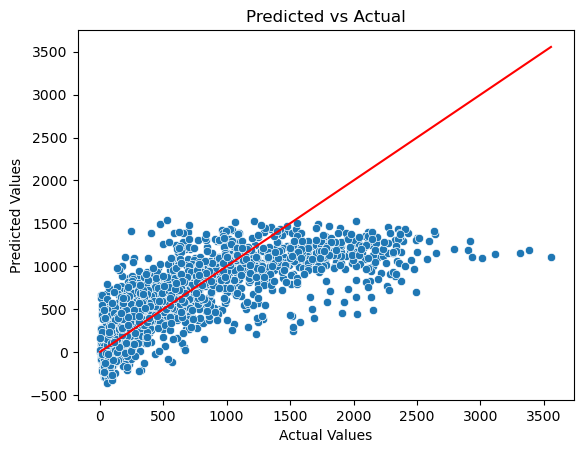

In [29]:
svr_model = SVR(kernel='poly', degree=3, coef0=350)

# Let's try a simple linear regression model first
svr_regression_y_pred = fit_model(X_train, X_test, y_train, y_test, svr_model, 'SVR Regression')

# Let's also plot the predictions vs the true values
plot_values(y_test, svr_regression_y_pred)

Not so good. Let's try Logistic Regression.

/Users/rajeebsharma/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model R^2 value:  -0.18826456301968664
Logistic Regression Mean Absolute Error value:  481.7974010632014
Logistic Regression Root Mean Squared Error value:  697.3782364020303


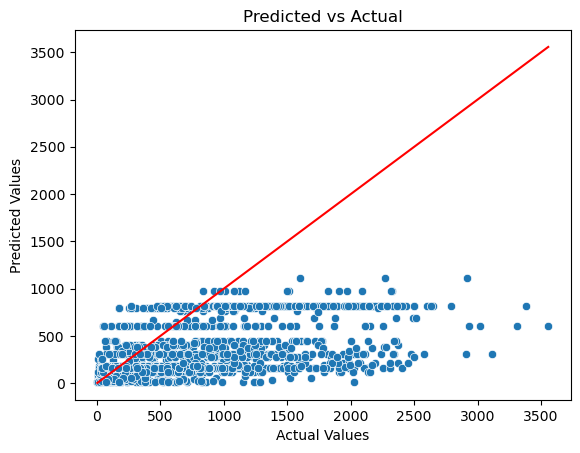

In [30]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Let's try a simple linear regression model first
log_regression_y_pred = fit_model(X_train, X_test, y_train, y_test, log_model, 'Logistic Regression')

# Let's also plot the predictions vs the true values
plot_values(y_test, log_regression_y_pred)

Doesn't do very good. Also takes a long time and does not converge. Let's try something else.

Let's try some tree based approaches and move away from linear models.

Decision Tree Model R^2 value:  0.8590671489748065
Decision Tree Mean Absolute Error value:  133.25812167749558
Decision Tree Root Mean Squared Error value:  240.16954535053083


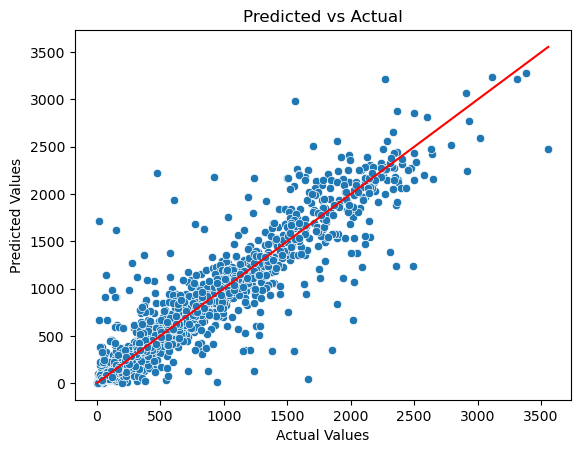

In [31]:
# Let's try doing a decision tree.
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(random_state=40)

# Fit the model
decision_tree_y_pred = fit_model(X_train, X_test, y_train, y_test, dtr_model, 'Decision Tree')

# Let's also plot the predictions vs the true values
plot_values(y_test, decision_tree_y_pred)


This is much better. We now have an $R^2 \sim 86\%$. ALso, the RMSE value is $\approx 240$, which is much better than the linear models.

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test, k_val):
    fs = SelectKBest(score_func=f_regression, k=k_val)
    # learn relationship from training data
    fs.fit(X_train, y_train)
	# transform train input data
    X_train_fs = fs.transform(X_train)
	# transform test input data
    X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs

for i in range(1, len(X_train.columns)+1):
    X_train_fs, X_test_fs = select_features(X_train, y_train, X_test, i)

    # Initiate the model
    dtr_model = DecisionTreeRegressor()

    print('Number of features chosen: ', i)
    y_pred_series = fit_model(X_train_fs,  X_test_fs, y_train, y_test, dtr_model, 'Decision Tree')
    print('-'*100)


Number of features chosen:  1
Decision Tree Model R^2 value:  0.2939283711917643
Decision Tree Mean Absolute Error value:  392.6500788524349
Decision Tree Root Mean Squared Error value:  537.5714525500895
----------------------------------------------------------------------------------------------------
Number of features chosen:  2
Decision Tree Model R^2 value:  0.36406943154314997
Decision Tree Mean Absolute Error value:  313.26017916912775
Decision Tree Root Mean Squared Error value:  510.17205700341515
----------------------------------------------------------------------------------------------------
Number of features chosen:  3
Decision Tree Model R^2 value:  0.6416411693815467
Decision Tree Mean Absolute Error value:  238.1122268163024
Decision Tree Root Mean Squared Error value:  382.9753947486322
----------------------------------------------------------------------------------------------------
Number of features chosen:  4
Decision Tree Model R^2 value:  0.676292511467335

Looks like even with a Tree Based Regressor, we get best result with all the parameters.

Let's do some **Randomized Search CV** to do some Hyperparameter tuning for the decision tree model to check get the best possible result. We will use different `criterion`, `max_depth`, `min_samples_split`, and `min_samples_leaf` for tuning.

Tree Search Model R^2 value:  0.8843067411910903
Tree Search Mean Absolute Error value:  124.23784514199458
Tree Search Root Mean Squared Error value:  217.60348389567065


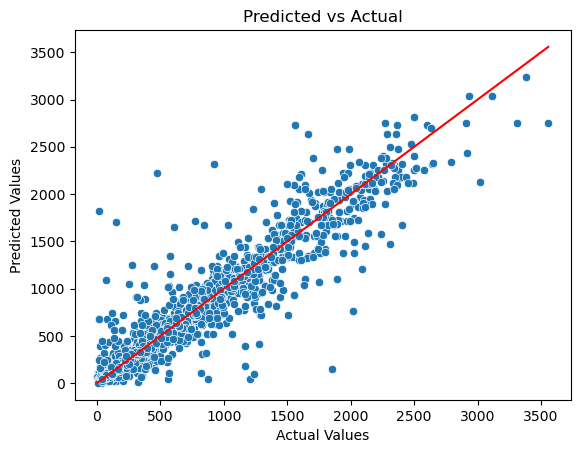

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.preprocessing import StandardScaler

#tree_pipeline = make_pipeline(#StandardScaler(),
#        DecisionTreeRegressor(random_state=40))

tree_params = dict(criterion = ['squared_error', 'poisson'],
                   max_depth = [None, 10, 20, 30, 40],
                   min_samples_split =  [2, 5, 10, 12],
                   min_samples_leaf = [1, 2, 4])


tree_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state=40), param_distributions=tree_params, random_state = 40)

tree_fit = tree_search.fit(X_train, y_train)

# Fit the model
y_pred_tree = fit_model(X_train, X_test, y_train, y_test, tree_search, 'Tree Search')

# Let's also plot the predictions vs the true values
plot_values(y_test, y_pred_tree)



With the Hyperparameter tuning we got the best score $R^2$ value of $88.5\%$.

Let's try creating a forest instead of only a tree. If a tree can do this good, a forest should do much better.

Random Forest Model R^2 value:  0.9279344281761579
Random Forest Mean Absolute Error value:  98.74281157708211
Random Forest Root Mean Squared Error value:  171.74169135145237


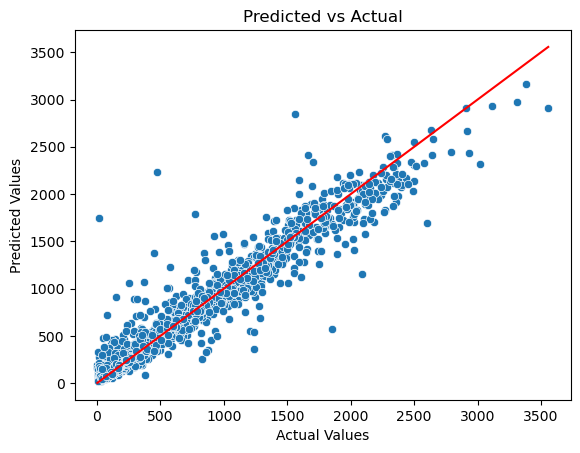

In [34]:
from sklearn.ensemble import RandomForestRegressor

rfg_model = RandomForestRegressor(random_state=40)

# Fit the model
random_forest_y_pred = fit_model(X_train, X_test, y_train, y_test, rfg_model, 'Random Forest')

# Let's also plot the predictions vs the true values
plot_values(y_test, random_forest_y_pred)



The Random Forest Regressor does the best till now with $R^2 \sim 93\%$. This is very good. Maybe we can also do some hyperparameter tuning for the Random Forest to improve this a little bit more. 

Random Forest Model R^2 value:  0.9269207492275858
Random Forest Mean Absolute Error value:  98.13548247330307
Random Forest Root Mean Squared Error value:  172.9453383027712


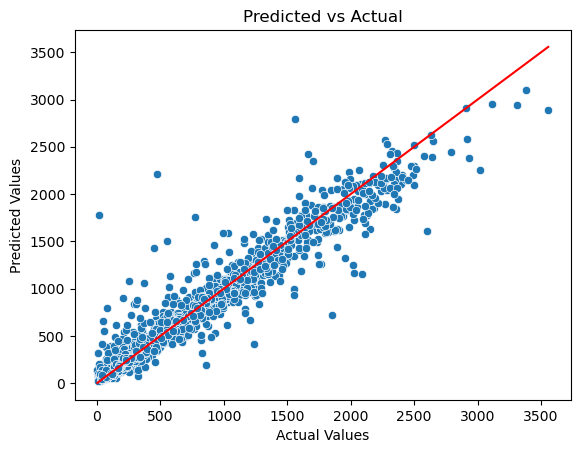

In [35]:
forest_params = dict(n_estimators = [1,10,100,150, 150],
                     criterion = ['squared_error', 'poisson'],
                    max_depth = [None, 10, 20, 30, 40],
                    min_samples_split =  [2, 5, 10, 12],
                    min_samples_leaf = [1, 2, 4],
                    bootstrap = [True, False])


forest_search = RandomizedSearchCV(estimator = RandomForestRegressor(random_state=40), param_distributions=forest_params, random_state = 40)

# Fit the model
y_pred_forest = fit_model(X_train, X_test, y_train, y_test, forest_search, 'Random Forest')

# Let's also plot the predictions vs the true values
plot_values(y_test, y_pred_forest)



Not really. The values are pretty similar. So $R^2 \sim 93\%$ is about the best we can do from this. Also the hyperparameter tuning took a long time. It does not look like there is much more we can get from this.